In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aylin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install numpy

You should consider upgrading via the 'c:\Users\aylin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aylin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Dosyaları Okuma, sütun adlarını güncelleme, satır-sütun sayılarını bulma**

Bu kısımda incelediğimiz 5 dosyayı okuyup, teker teker sütunlarını tanımlayan başlıklarla yeniden isimlendirdim. Her dosyanın satır ve sütun sayısına bakıp bunları ekrana yazdırdım. Ayrıca ilerleyen adımlarda yaptığım adımlarda yardımcı olması adına her dosyanın içinde hangi sütunda kaç tane Nan değeri olduğuna baktım.

In [9]:
"""
players dosyasında Nan değer yok.
[7228 rows x 4 columns]
(7228, 4)

oyuncu_ismi    0
takim_id       0
oyuncu_id      0
sezon          0


teams dosyasında; arena kapasitesinde 4 tane nan 1 tane 0 değeri var


games dosyasında;
evsah_puan                99
evsah_atilanatis_yuzde    99
evsah_serbatis_yuzde      99
evsah_ucluk_yuzde         99
evsah_asist               99
evsah_rebound             99
ziyar_puan                99
ziyar_atilanatis_yuzde    99
ziyar_serbatis_yuzde      99
ziyar_ucluk_yuzde         99
ziyar_asist               99
ziyar_rebound             99


ranking dosyasında;
takim_id                0
sezon_id                0
standingsdate           0
konferans               0
takim                   0
G                       0
W                       0
L                       0
kazanma_yuzdesi         0
evsahibiyken_WL         0
deplasmanda_WL          0
return_to_play     197802
dtype: int64


games_details dosyasında;
oyun_id                     0
takim_id                    0
kisaltma                    0
takim_sehir                 0
oyuncu_id                   0
oyuncu_adi                  0
lakap                  615591
baslangic_poz          398738
comment                540351
oynanan_dk             105603
yapilan_atis           105603
denenen_atis           105603
atis_yuzde             105603
yapilan_ucluk          105603
denenen_ucluk          105603
ucluk_yuzde            105603
yapilan_serbestatis    105603
denenen_serbestatis    105603
serbestatis_yuzde      105603
hucum_reb              105603
savunma_reb            105603
rebound                105603
asist                  105603
top_calma              105603
blok                   105603
top_kaybi              105603
bireysel_foul          105603
oyuncu_sayisi          105603
plus_minus             129264
dtype: int64
"""

'\nplayers dosyasında Nan değer yok.\n[7228 rows x 4 columns]\n(7228, 4)\n\noyuncu_ismi    0\ntakim_id       0\noyuncu_id      0\nsezon          0\n\n\nteams dosyasında; arena kapasitesinde 4 tane nan 1 tane 0 değeri var\n\n\ngames dosyasında;\nevsah_puan                99\nevsah_atilanatis_yuzde    99\nevsah_serbatis_yuzde      99\nevsah_ucluk_yuzde         99\nevsah_asist               99\nevsah_rebound             99\nziyar_puan                99\nziyar_atilanatis_yuzde    99\nziyar_serbatis_yuzde      99\nziyar_ucluk_yuzde         99\nziyar_asist               99\nziyar_rebound             99\n\n\nranking dosyasında;\ntakim_id                0\nsezon_id                0\nstandingsdate           0\nkonferans               0\ntakim                   0\nG                       0\nW                       0\nL                       0\nkazanma_yuzdesi         0\nevsahibiyken_WL         0\ndeplasmanda_WL          0\nreturn_to_play     197802\ndtype: int64\n\n\ngames_details dosyasında;\no

In [6]:
df_oyuncular = pd.read_csv("players.csv" )
df_oyuncular.columns = ["oyuncu_ismi" , "takim_id" , "oyuncu_id" , "sezon"]
print(df_oyuncular)
print(f'Players, yeni adıyla oyuncular {df_oyuncular.shape[0]} satır ve {df_oyuncular.shape[1]} sütundan oluşmaktadır')
print(df_oyuncular.isnull().sum())


df_takimlar = pd.read_csv("teams.csv")
#burada lig id, zaten sadece nba olduğu için hepsi aynı ve 0
df_takimlar.columns = ["lig_id" , "takim_id" , "min_sene" , "max_sene" , "kisaltma" , "lakap" , "kurulus_senesi" , "sehir" ,
 "arena" , "arena_kapasite" , "sahip" , "menejer" , "koc" , "d_ligi"]
#df_takimlar = df_takimlar.T.drop_duplicates().T
df_takimlar.drop("lig_id" , axis = 1 , inplace = True)
print(df_takimlar)
print(f'Teams, yeni adıyla takımlar {df_takimlar.shape[0]} satır ve {df_takimlar.shape[1]} sütundan oluşmaktadır')
print(df_takimlar.isnull().sum())
print(df_takimlar["arena_kapasite"].min())
print(df_takimlar["arena_kapasite"].mean())


df_oyunlar = pd.read_csv("games.csv")

df_oyunlar.columns = ["oyun_tarihi" , "oyun_id" , "statu" , "evsah_id" , "ziyar_id" , "sezon" , "evsah_id" ,
 "evsah_puan" , "evsah_atilanatis_yuzde" , "evsah_serbatis_yuzde" , "evsah_ucluk_yuzde" , "evsah_asist" , "evsah_rebound" ,
 "ziyar_id" , "ziyar_puan" ,  "ziyar_atilanatis_yuzde" , "ziyar_serbatis_yuzde" , "ziyar_ucluk_yuzde" , "ziyar_asist" ,
  "ziyar_rebound" , "kazanan"]
#buradaki oyunların hepsi final oyunudur o nedenle statü hepsinde finaldir
df_oyunlar = df_oyunlar.T.drop_duplicates().T
print(df_oyunlar)
print(f'Games, yeni adıyla oyunlar {df_oyunlar.shape[0]} satır ve {df_oyunlar.shape[1]} sütundan oluşmaktadır')
print(df_oyunlar.isnull().sum())


df_siralama = pd.read_csv("ranking.csv")
df_siralama.columns = ["takim_id" , "lig_id" , "sezon_id" , "standingsdate" , "konferans" , "takim" , "G" , "W" , "L" ,
"kazanma_yuzdesi" , "evsahibiyken_WL" , "deplasmanda_WL" , "return_to_play"]
df_siralama = df_siralama.T.drop_duplicates().T
df_siralama.drop("lig_id" , axis = 1 , inplace = True)
print(df_siralama)
print(f'Ranking, yeni adıyla siralama {df_siralama.shape[0]} satır ve {df_siralama.shape[1]} sütundan oluşmaktadır')
print(df_siralama.isnull().sum())


df_oyun_detaylari = pd.read_csv("games_details.csv")
df_oyun_detaylari.columns = ["oyun_id" , "takim_id" , "kisaltma" , "takim_sehir" , "oyuncu_id" , "oyuncu_adi" , "lakap" , 
"baslangic_poz" , "comment" , "oynanan_dk" , "yapilan_atis" , "denenen_atis" , "atis_yuzde" , "yapilan_ucluk" , "denenen_ucluk" , 
"ucluk_yuzde" , "yapilan_serbestatis" , "denenen_serbestatis" , "serbestatis_yuzde" , "hucum_reb" , "savunma_reb" , "rebound" , 
"asist" , "top_calma" , "blok" , "top_kaybi" , "bireysel_foul" , "oyuncu_sayisi" , "plus_minus"]
df_oyun_detaylari
print(f'Games Details, yeni adıyla oyun detaylari {df_oyun_detaylari.shape[0]} satır ve {df_oyun_detaylari.shape[1]} sütundan oluşmaktadır')
print(df_oyun_detaylari.isnull().sum())



           oyuncu_ismi    takim_id  oyuncu_id  sezon
0        Royce O'Neale  1610612762    1626220   2019
1     Bojan Bogdanovic  1610612762     202711   2019
2          Rudy Gobert  1610612762     203497   2019
3     Donovan Mitchell  1610612762    1628378   2019
4          Mike Conley  1610612762     201144   2019
...                ...         ...        ...    ...
7223       Lanny Smith  1610612758     201831   2009
7224     Warren Carter  1610612752     201999   2009
7225      Bennet Davis  1610612751     201834   2009
7226    Brian Hamilton  1610612751     201646   2009
7227   Wesley Matthews  1610612762     500032   2009

[7228 rows x 4 columns]
Players, yeni adıyla oyuncular 7228 satır ve 4 sütundan oluşmaktadır
oyuncu_ismi    0
takim_id       0
oyuncu_id      0
sezon          0
dtype: int64
      takim_id  min_sene  max_sene kisaltma          lakap  kurulus_senesi  \
0   1610612737      1949      2019      ATL          Hawks            1949   
1   1610612738      1946      201

C:\Users\aylin\AppData\Local\Temp\ipykernel_6748\612859379.py:44: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_oyun_detaylari = pd.read_csv("games_details.csv")


Games Details, yeni adıyla oyun detaylari 645953 satır ve 29 sütundan oluşmaktadır
oyun_id                     0
takim_id                    0
kisaltma                    0
takim_sehir                 0
oyuncu_id                   0
oyuncu_adi                  0
lakap                  615591
baslangic_poz          398738
comment                540351
oynanan_dk             105603
yapilan_atis           105603
denenen_atis           105603
atis_yuzde             105603
yapilan_ucluk          105603
denenen_ucluk          105603
ucluk_yuzde            105603
yapilan_serbestatis    105603
denenen_serbestatis    105603
serbestatis_yuzde      105603
hucum_reb              105603
savunma_reb            105603
rebound                105603
asist                  105603
top_calma              105603
blok                   105603
top_kaybi              105603
bireysel_foul          105603
oyuncu_sayisi          105603
plus_minus             129264
dtype: int64


Bu kısımda, maç kazanan takımların kendi evlerinde ve deplasmanda olmalarına göre yaptıkları asist , rebound ve aldıkları puanlar karşılaştırılmıştır.


In [7]:
def ortalama(grup , sutun) :
    return grup[sutun].mean()


kazanan_kaybeden = df_oyunlar.groupby("kazanan")
kazanan = kazanan_kaybeden.get_group(1)
kaybeden = kazanan_kaybeden.get_group(0)


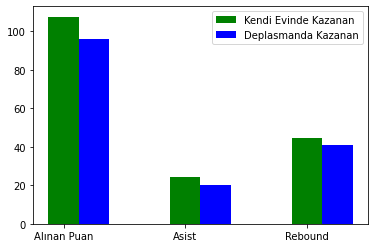

In [8]:
x = [ortalama(kazanan,"evsah_puan"),ortalama(kazanan,"evsah_asist"),
     ortalama(kazanan,"evsah_rebound")]
y = [ortalama(kazanan,"ziyar_puan"),ortalama(kazanan,"ziyar_asist"),
     ortalama(kazanan,"ziyar_rebound")]

ti = ["Alınan Puan" , "Asist" , "Rebound"]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = "g",label = 'Kendi Evinde Kazanan')
plt.bar(hor + 0.25,y,width = 0.25,color = "b",label = 'Deplasmanda Kazanan')
plt.legend()


Grafikten görebileceğimiz gibi, takımlar kendi evlerinde oynadığında aldıkları puanda asistlerinde ve reboundlarında pozitif bir etki oluyor.

**Maçların Nerelerde Oynandığı**

     oyun_id evsahibi_id ziyaretci_id evsahibi_takim ziyaretci_takim  \
0   22101002  1610612759   1610612762    San Antonio            Utah   
1   22100973  1610612759   1610612747    San Antonio     L.A. Lakers   
2   22100944  1610612759   1610612758    San Antonio      Sacramento   
3   22100935  1610612745   1610612762        Houston            Utah   
4   22100985  1610612745   1610612747        Houston     L.A. Lakers   
5   22100929  1610612745   1610612746        Houston     LA Clippers   
6   22100999  1610612745   1610612742        Houston          Dallas   
7   22100964  1610612745   1610612763        Houston         Memphis   
8   22100950  1610612740   1610612762    New Orleans            Utah   
9   22100937  1610612740   1610612758    New Orleans      Sacramento   
10  22100913  1610612756   1610612762        Phoenix            Utah   
11  22100939  1610612756   1610612757        Phoenix        Portland   
12  22100972  1610612742   1610612762         Dallas            

<AxesSubplot:ylabel='arena'>

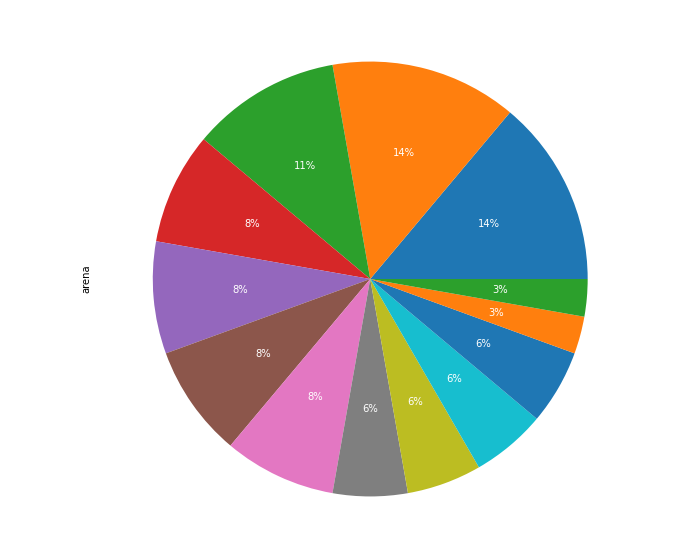

In [49]:
df1 = pd.DataFrame({"oyun_id" : df_oyunlar["oyun_id"].head(100) , 
"evsahibi_id" : df_oyunlar["evsah_id"].head(100) , 
"ziyaretci_id" : df_oyunlar["ziyar_id"].head(100)})

df2 = pd.DataFrame({"evsahibi_id" : df_siralama["takim_id"].head(100) ,
"evsahibi_takim" : df_siralama["takim"].head(100)} )

df3 = pd.DataFrame({"ziyaretci_id" : df_siralama["takim_id"].head(100) , 
"ziyaretci_takim" : df_siralama["takim"].head(100)})

df4 = df1.merge(df2 , on = "evsahibi_id")
df5 = df4.merge(df3 , on = "ziyaretci_id")
df5 = df5.drop_duplicates(subset = ["oyun_id" , "evsahibi_id" , "ziyaretci_id" , "evsahibi_takim" , "ziyaretci_takim" ])

df6 = pd.DataFrame({"evsahibi_id" : df_takimlar["takim_id"].head(100) , 
"arena" : df_takimlar["arena"].head(100)})
df7 = df5.merge(df6 , on = "evsahibi_id")
print(df7) 
df7.arena.value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})

**Arena Kapasitesinin Ev sahibi takımın galibiyetine etkisi**

burada arena kapasitesi sütununda 4 tane nan değer vardı. bunlar yerine arena kapasitesinin ortalama değerlerini ekledim

    evsahibi_id  kapasite kazanan
16   1610612753         0     443
21   1610612758     17500     405
12   1610612749     17500     490
8    1610612745     18104     562
26   1610612763     18119     503
17   1610612754     18345     542
14   1610612751     18553     429
3    1610612740     18553     444
19   1610612756     18553     491
18   1610612755     18553     451
1    1610612738     18624     581
22   1610612759     18694     677
0    1610612737     18729     484
29   1610612766     19026     382
10   1610612747     19060     564
9    1610612746     19060     521
6    1610612743     19099     574
23   1610612760     19163     524
5    1610612742     19200     570
13   1610612750     19356     385
7    1610612744     19596     578
11   1610612748     19600     609
15   1610612752     19763     381
24   1610612761     19800     509
20   1610612757     19980     517
25   1610612762     20148     556
2    1610612739     20562     532
27   1610612764     20647     439
28   161061276

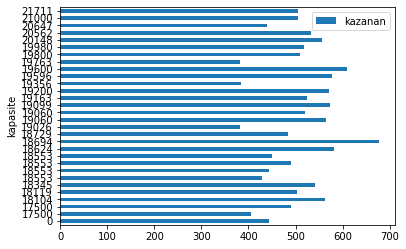

In [10]:
a = df_takimlar["arena_kapasite"].mean()
df_takimlar.fillna(a , inplace = True)

df_arena_kap = pd.DataFrame({"evsahibi_id" : df_takimlar["takim_id"] ,
 "kapasite" : df_takimlar["arena_kapasite"]})

df_kazanan = pd.DataFrame({"evsahibi_id" : df_oyunlar["evsah_id"] , 
"kazanan" : df_oyunlar["kazanan"] })
df1 = df_kazanan.merge(df_arena_kap , on = "evsahibi_id")
df1.drop_duplicates(subset = ["evsahibi_id" , "kazanan" , "kapasite"])
df2 = df1[df1["kazanan"]==1]
df3 = df2.groupby(["evsahibi_id","kapasite"])["kazanan"].sum().reset_index()
df3['kapasite'] = df3['kapasite'].astype(int)
df3=df3.sort_values('kapasite')
print(df3)
df3.plot.barh(x="kapasite",y="kazanan")
plt.show()

arena kapasitelerini büyükten küçüğe göre sıraladığımız bu grafikte o arenada kaç maç kazanıldığına baktık. Ve bu grafik doğrusal şekilde bir artış göstermediği için, maalesef arena kapasitelerinin takımların maç kazanmasında bir etkisi olduğunu söyleyemiyoruz.

**Takımların kuruluş yıllarının kazanma yüzdeliklerine etkisi**

      takim_id                  takim_adi  kurulus  kazanma_yuzdesi
1   1610612738                     Boston     1946         0.560991
18  1610612752                   New York     1946         0.399122
8   1610612744               Golden State     1946         0.536370
32  1610612765                    Detroit     1948         0.472246
24  1610612758                 Sacramento     1948         0.404347
12  1610612747                L.A. Lakers     1948         0.527680
0   1610612737                    Atlanta     1949         0.458405
21  1610612755               Philadelphia     1949         0.438196
31  1610612764                 Washington     1961         0.416548
5   1610612741                    Chicago     1966         0.484721
27  1610612760                    Seattle     1967         0.421319
9   1610612745                    Houston     1967         0.565434
26  1610612760              Oklahoma City     1967         0.564325
22  1610612756                    Phoenix     19

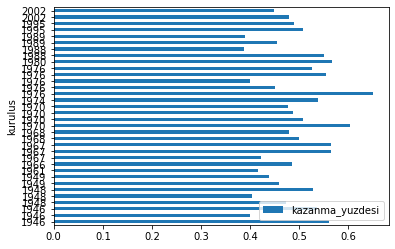

In [21]:
df_kazanma_yuzdesi = pd.DataFrame({"kazanma_yuzdesi" : df_siralama["kazanma_yuzdesi"] , 
"takim_id" : df_siralama["takim_id"] , 
"takim_adi" : df_siralama["takim"]})

df_kurulus = pd.DataFrame({"takim_id" : df_takimlar["takim_id"] , "kurulus" : df_takimlar["kurulus_senesi"]})

df8 = df_kazanma_yuzdesi.merge(df_kurulus , on = "takim_id")
df8.drop_duplicates(subset = ["kazanma_yuzdesi" , "takim_id" , "takim_adi" , "kurulus"])
df9 = df8.groupby(["takim_id" , "takim_adi" ,  "kurulus"])["kazanma_yuzdesi"].mean().reset_index()
df9
df9=df9.sort_values('kurulus')
print(df9)
df9.plot.barh(x="kurulus", y="kazanma_yuzdesi")
plt.show()

df_takimlar dosyasındaki min_year sütunu takımın en az maç kazandığı yıldır. Bu sütun kuruluş yılı ile duplicate tir. Buradan her takımın kuruldukları senenin en başarısız sene olduğunu söyleyebiliriz. Ancak takımların kaç senelik olduğunu ve kazandıklarını maç sayısını karşılaştırdığımızda, yularıdaki grafikteki gibi, aralarında bir ilişki olmadığını görebiliyoruz.

**Daha Fazla Üçlük Denemenin Galibiyete Etkisi**

In [13]:
df8 = df_oyun_detaylari.merge(df_oyunlar , on = "oyun_id")
df8 = df8.groupby(["oyun_id","takim_id","evsah_id","kazanan","denenen_atis"])["denenen_ucluk"].sum().reset_index()

i=0
kazanan_atis=0
kazanan_ucluk=0
kaybeden_ucluk=0
kaybeden_atis=0
for row in df8["oyun_id"]:
   
   if(str(df8["kazanan"][i])=="1"):
       if(df8["takim_id"][i]==df8["evsah_id"][i]):
          
               kazanan_ucluk+=float(df8["denenen_ucluk"][i])
               kazanan_atis+=float(df8["denenen_atis"][i])
       
       else:
           
               kaybeden_ucluk+=float(df8["denenen_ucluk"][i])
               kaybeden_atis+=float(df8["denenen_atis"][i])
         
   else:
       if(df8["takim_id"][i]==df8["evsah_id"][i]):
           
               kaybeden_ucluk+=float(df8["denenen_ucluk"][i])
               kaybeden_atis+=float(df8["denenen_atis"][i])
       else:
          
               kazanan_ucluk+=float(df8["denenen_ucluk"][i])
               kazanan_atis+=float(df8["denenen_atis"][i])
            
   i+=1

print("Kazananların üçlük sayısı oranı: "+str((kazanan_ucluk/kazanan_atis)*100)+" %")
print("Kaybedenlerin üçlük sayısı oranı: "+str((kaybeden_ucluk/kaybeden_atis)*100)+" %")


Kazananların üçlük sayısı oranı: 33.27211272031877 %
Kaybedenlerin üçlük sayısı oranı: 32.84736685510265 %


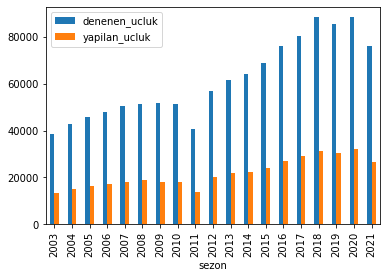

In [23]:
df8 = df_oyun_detaylari.merge(df_oyunlar , on = "oyun_id")
df9 = df8.groupby(["oyun_id","takim_id","sezon","denenen_atis"])["denenen_ucluk"].sum().reset_index()
df10 = df8.groupby(["oyun_id","takim_id","sezon","denenen_atis"])["yapilan_ucluk"].sum().reset_index()
df9["yapilan_ucluk"]=df10["yapilan_ucluk"]


df9=df9.groupby("sezon").sum()
df9.plot.bar(y=["denenen_ucluk","yapilan_ucluk"])
plt.show()

**Oyuncuların başlangıç pozisyonlarının, maça katkılarına etkisi**

  baslangic_poz  plus_minus
0             C    0.276668
1             F    0.389700
2             G    0.384843


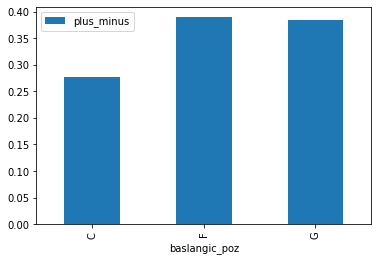

In [17]:
df_oyun_detaylari.groupby("baslangic_poz")["plus_minus"].mean()
print(df_oyun_detaylari.groupby("baslangic_poz")["plus_minus"].mean().reset_index())
df_oyun_detaylari.groupby("baslangic_poz")["plus_minus"].mean().reset_index().plot.bar(x="baslangic_poz")
plt.show()

**Defensive-offensive rebound etkisi**

Kazanan takımların offensive rebounda ve deffensive rebounda verdikleri önemin kazanma üzerinde etkisi olup olmadığını inceleyeceğim

                      hucum_reb  savunma_reb
oyun_id  evsahibi_id                        
10300001 1610612762        21.0         58.0
10300002 1610612763        25.0         66.0
10300004 1610612742        21.0         60.0
10300005 1610612757        22.0         44.0
10300007 1610612748        32.0         67.0
...                         ...          ...
52000101 1610612738        27.0         71.0
52000111 1610612754        19.0         71.0
52000121 1610612747        22.0         73.0
52000131 1610612763        26.0         85.0
52000201 1610612764        16.0         76.0

[15138 rows x 2 columns]
                       hucum_reb  savunma_reb
oyun_id  ziyaretci_id                        
10300003 1610612739         24.0         65.0
10300008 1610612751         22.0         60.0
10300011 1610612739         17.0         70.0
10300014 1610612765         23.0         51.0
10400064 1610612743         20.0         60.0
...                          ...          ...
42000314 1610612756  

<AxesSubplot:ylabel='None'>

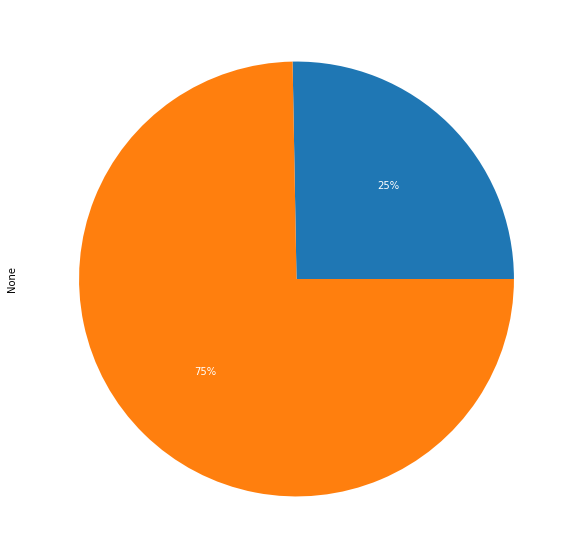

In [18]:
df_kazananlar = pd.DataFrame({"oyun_id" : df_oyunlar["oyun_id"] ,
"evsahibi_id" : df_oyunlar["evsah_id"] ,
"ziyaretci_id" : df_oyunlar["ziyar_id"] , 
"kazanan" : df_oyunlar["kazanan"]})
df_kazananlar.dropna()


df_reb = pd.DataFrame({"oyun_id" : df_oyun_detaylari["oyun_id"] ,
"hucum_reb" : df_oyun_detaylari["hucum_reb"] ,
"savunma_reb" : df_oyun_detaylari["savunma_reb"]})
df_reb.dropna()

df1 = df_reb.merge(df_kazananlar[df_kazananlar["kazanan"]==1] , on = "oyun_id" ).groupby(["oyun_id" , "evsahibi_id" ]).sum()
print(df1)

df0 =df_reb.merge(df_kazananlar[df_kazananlar["kazanan"]==0] , on = "oyun_id" ).groupby(["oyun_id" , "ziyaretci_id" ]).sum()
print(df0)

a = df1["hucum_reb"].sum()
b = df1["savunma_reb"].sum()

c = df0["hucum_reb"].sum()
d = df0["savunma_reb"].sum()

print(a, b, c, d)

df3 = pd.Series({"huc_reb_or" : ((a + c)/ (a+b+c+d)) , "sav_reb_or" : ((b + d)/ (a+b+c+d))})
df3
print(df3)
df3.plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})



**En skorer on oyuncunun hücum rebound, savunma reboundı, top çalma ve blok arasında en çok neyi yaptığı**

<AxesSubplot:ylabel='None'>

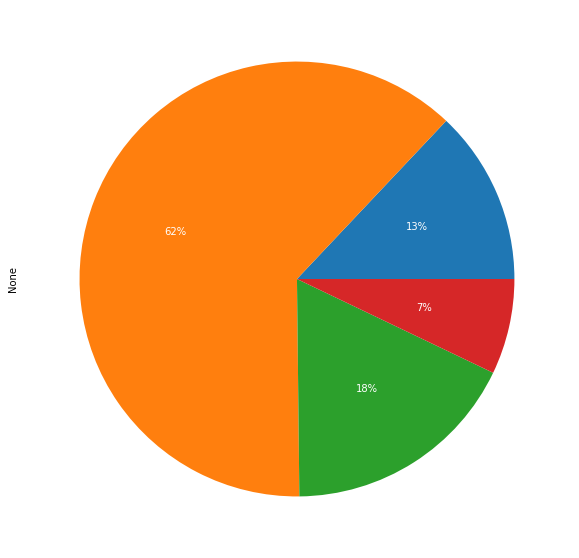

In [124]:
df_skorer_oyuncu = pd.DataFrame({"oyuncu_id" : df_oyun_detaylari["oyuncu_id"] ,
"oyuncunun_katkisi" : df_oyun_detaylari["oyuncu_sayisi"] ,
"hucum_reb" : df_oyun_detaylari["hucum_reb"] ,
"savunma_reb" : df_oyun_detaylari["savunma_reb"] , 
"top_calma" : df_oyun_detaylari["top_calma"] ,
"blok" : df_oyun_detaylari["blok"]}).groupby([ "oyuncu_id"]).sum()

ilk_on = df_skorer_oyuncu.sort_values("oyuncunun_katkisi" , ascending = False)[:10]
ilk_on

ilk_on.drop("oyuncunun_katkisi", axis = 1 , inplace =True)
ilk_on.sum().plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})